<a href="https://colab.research.google.com/github/KyoungmiKwon/Bigdata_Training_at_ITwill/blob/main/Team_Project/C05_KM_2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [33]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# 데이터 불러오기

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Project/C03_KM_Text_Preprocessing_2.xlsx'
data = pd.read_excel(file_path,sheet_name='all_resize',header=0)

In [3]:
print(len(data))

1352


In [4]:
data[:1]

,No,Code,Date,Journal,Title,Text,URL,Sample Y/N,In Charge,S,seperate
0,14,5930,2021.04.14 17:40,한국경제,"삼성 '13조 상속세'…연부연납 활용, 올해 낼 2兆 중 1.2兆 대출...",삼성 조 상속세 이재용 부회장 등 재원 마련은보유주식 담보대출 적용나머지는 부동...,https://finance.naver.com/item/news_read.nhn?a...,A,JY,0,"상속세', '재원', '마련', '보유', '적용', '나머지', '부동산', '매..."


In [5]:
text=[]
for a in data['seperate']:
    b = a.replace("'", '').replace('[', '').replace(']', '')
    c = b.split(',')
    
    temp = []
    for word in c:
        temp.append(word)
    text.append(temp)

# 단어 사전 만들기 (단어-인덱스 맵핑)

In [6]:
word_idx = {}
for a in data['seperate']:
    b = a.replace("'", '').replace('[', '').replace(']', '')
    c = b.split(',')
    
    for word in c:
        if word not in word_idx:
            word_idx[word] = len(word_idx) +1

print(word_idx)

{'상속세': 1, ' 재원': 2, ' 마련': 3, ' 보유': 4, ' 적용': 5, ' 나머지': 6, ' 부동산': 7, ' 매각': 8, ' 비롯': 9, ' 회장': 10, ' 상속세': 11, ' 이달': 12, ' 방법': 13, ' 관심': 14, ' 제도': 15, ' 활용': 16, ' 방식': 17, ' 이자': 18, ' 전체': 19, ' 조원': 20, ' 예상': 21, ' 가량': 22, ' 주식': 23, ' 평가': 24, ' 확정': 25, ' 감안': 26, ' 금액': 27, ' 소장': 28, ' 현금': 29, ' 추정': 30, ' 경기': 31, ' 일부': 32, ' 자산': 33, ' 최대': 34, ' 가치': 35, ' 최고': 36, ' 재계': 37, ' 관계자': 38, ' 이중': 39, ' 그룹': 40, ' 영향': 41, ' 고려': 42, ' 설명': 43, ' 금융': 44, ' 시작': 45, ' 관측': 46, ' 이유': 47, ' 일각': 48, ' 매물': 49, ' 한국': 50, '회의': 51, ' 직후': 52, ' 생산': 53, ' 전망': 54, ' 수익성': 55, ' 제조': 56, ' 인증': 57, ' 상당': 58, ' 시간': 59, ' 라인': 60, ' 전환': 61, ' 기존': 62, ' 고객사': 63, ' 공급': 64, ' 문제': 65, ' 발생': 66, ' 대통령': 67, ' 백악관': 68, ' 회의': 69, ' 차량': 70, ' 완성차': 71, ' 업계': 72, ' 부족': 73, ' 해소': 74, ' 마이크로': 75, ' 컨트롤': 76, ' 현실': 77, ' 파운드리': 78, ' 공장': 79, ' 사진': 80, ' 싱어': 81, ' 최고경영자': 82, ' 현지': 83, ' 공급망': 84, ' 이후': 85, ' 실제': 86, ' 목표': 87, ' 아래': 88, ' 협의': 89, ' 진행': 90, '

# 텍스트를 숫자들의 리스트로 변환

In [ ]:
sample = [] # 단어들의 리스트를 저장할 리스트
for artc in text:
    temp = [] # 하나의 문장을 숫자들로 변환한 리스트
    for word in artc:
        temp.append(word_idx[word]) # 사전에서 단어에 매핑된 인덱스를 찾아서 리스트에 추가.
    sample.append(temp) # 기사별로 인덱스 변환

sample[:2]

# One-hot encording

In [ ]:
# 1.단어의 순서 고려하는 one-hot encording
max_rows = 450
max_cols = max(word_idx.values()) +1
sample_one_hot = np.zeros(shape=(len(data),max_rows, max_cols))

for i, s in enumerate(sample):
    for j, v in list(enumerate(s))[:max_rows]:
        sample_one_hot[i,j,v] = 1

print(sample_one_hot)

# [[[0. 1. 0. ... 0. 0. 0.]
#   [0. 0. 1. ... 0. 0. 0.]
#   [0. 0. 0. ... 0. 0. 0.]

In [9]:
# 2.단어의 순서 고려하지 않는 one-hot encording
# 사용된 단어 인덱스에는 1, 사용되지 않은 인덱스에는 0

max_cols = max(word_idx.values()) + 1
one_hot = np.zeros(shape=(len(data), max_cols),
                          dtype=np.int32)
for i, s in enumerate(sample):
    for w in s[:max_cols]:
        one_hot[i, w] = 1

print(one_hot[:2])

# [[0 1 1 ... 0 0 0], [0 0 0 ... 0 0 0]]

[[0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 데이터 정제
    keras.preprocessing.sequence.pad_sequences() 함수 사용
    자르거나 또는 패딩을 채우기

In [15]:
# 부정,중립,긍정으로 할 경우
X = sample.copy()
y = np.array(data['S'])

In [16]:
# 긍정, 긍정이 아닌 경우 : 이진분류로 치환시
y_1 = data['S'].replace(0,-1)
y = np.array(y_1)

In [17]:
X = keras.preprocessing.sequence.pad_sequences(sequences= X, maxlen= 300,padding='post',truncating='post')
# pad_sequences() 함수의 parameter:
# maxlen: sequence의 최대 길이
# padding='pre': maxlen보다 길이가 짧은 시퀀스일 때 패딩을 앞에서부터 채움
# truncating='pre': maxlen보다 길이가 긴 시퀀스일 때 앞에서 자름.

# 셋트 분리

In [18]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y,             
                                          test_size = 0.2,
                                          stratify = y)

In [46]:
np.unique(y_tr, return_counts=True), X_tr.shape,X_ts.shape,y_tr.shape,y_ts.shape

((array([-1,  1]), array([542, 539])),
 (1081, 300),
 (271, 300),
 (1081,),
 (271,))

# Keras model

## LSTM 생성

In [54]:
model = keras.Sequential()

In [55]:
model.add(keras.layers.Embedding(input_dim=1833, output_dim=64, input_length=300))
        #> input_dim=최대 특성 개수(어휘 사전에서 선택한 단어 수)
        #> input_length=샘플 하나가 가지고 있는 특성 수(단어 수)
        #> output_dim=순환층의 unit의 개수
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)))
        #> return_sequences=순환층의 출력이 다른 순환층의 입력으로 사용될 때 True로 설정
model.add(keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=False)))
model.add(keras.layers.Dense(units=16, activation='selu'))
model.add(keras.layers.Dense(units=8, activation='selu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))
# compile
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='accuracy')
# model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 300, 64)           117312    
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 300, 128)          66048     
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 64)                41216     
_________________________________________________________________
dense_28 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 9         
Total params: 225,761
Trainable params: 225,761
Non-trainable params: 0
________________________________________________

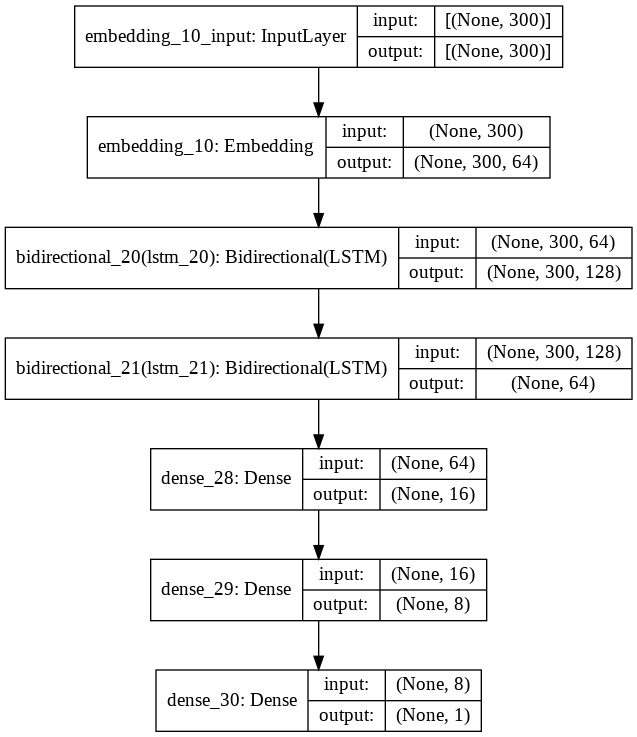

In [56]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 훈련

In [57]:
#  콜백(조기 종료, 상태 저장)
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('lstm.h5',save_best_only=True)

# 훈련
history = model.fit(X_tr,y_tr,
                    batch_size=64, epochs=1000,
                    validation_split = 0.2, validation_batch_size=64,
                    callbacks=[early_stop,check_point])

Epoch 1/1000
14/14 [==============================] - 7s 149ms/step - loss: 0.3050 - accuracy: 0.0867 - val_loss: 0.2765 - val_accuracy: 0.0000e+00
Epoch 2/1000
14/14 [==============================] - 1s 54ms/step - loss: -1.9183 - accuracy: 0.0105 - val_loss: -1.8421 - val_accuracy: 0.2442
Epoch 3/1000
14/14 [==============================] - 1s 52ms/step - loss: -5.7049 - accuracy: 0.1539 - val_loss: -2.3473 - val_accuracy: 0.1429
Epoch 4/1000
14/14 [==============================] - 1s 52ms/step - loss: -7.7411 - accuracy: 0.0973 - val_loss: 3.3461 - val_accuracy: 0.0138
Epoch 5/1000
14/14 [==============================] - 1s 52ms/step - loss: -4.2105 - accuracy: 0.1148 - val_loss: -2.2836 - val_accuracy: 0.1889
Epoch 6/1000
14/14 [==============================] - 1s 51ms/step - loss: -17.8596 - accuracy: 0.3653 - val_loss: -5.9766 - val_accuracy: 0.3134
Epoch 7/1000
14/14 [==============================] - 1s 54ms/step - loss: -24.3274 - accuracy: 0.4161 - val_loss: -7.0163 - va

In [58]:
hist = pd.DataFrame(history.history)
hist[:5]

,loss,accuracy,val_loss,val_accuracy
0,0.059788,0.028935,0.276476,0.000000
1,-2.615518,0.012731,-1.842124,0.244240
2,-6.292393,0.090278,-2.347283,0.142857
3,-4.633887,0.048611,3.346101,0.013825
4,-8.980721,0.228009,-2.283551,0.188940
